# Ejercicio 1 - Preparación del Ambiente de trabajo

In [62]:
# Librerias Básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Imports necesarios
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [78]:
# Agregar base de datos en el ambiente de trabajo

df = pd.read_csv('default_credit.csv')
df = df.drop(['index'], axis=1)
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [64]:
# Inspeccione la ditribución de cada tributo

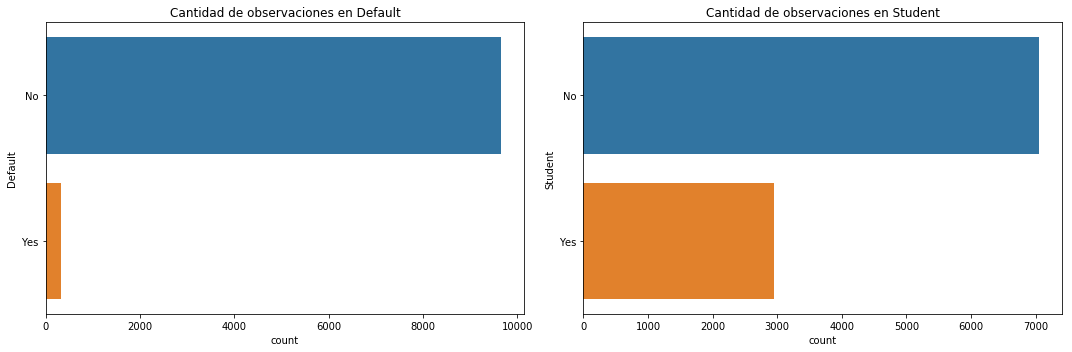

In [65]:
# Variables Binarias

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(y=df['default'], order=df['default'].value_counts().index);
plt.title('Cantidad de observaciones en Default')
plt.ylabel('Default');


plt.subplot(1, 2, 2)
sns.countplot(y=df['student'], order=df['student'].value_counts().index);
plt.title('Cantidad de observaciones en Student')
plt.ylabel('Student')

plt.tight_layout()



<Figure size 432x288 with 0 Axes>

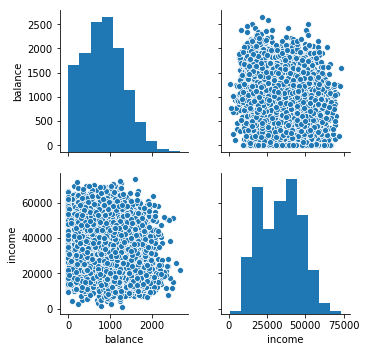

In [66]:
# Variables Continuas

plt.figure()
sns.pairplot(df)

Las variables Income y Balance presentan una distribución similar a normal.

# Ejercicio 2 - Modelo Base

* Transforme los atributos pertinentes con LabelEncoder

In [67]:
label_encoder = LabelEncoder()       
df['default_binary']= label_encoder.fit_transform(df['default'])
df['student_binary']= label_encoder.fit_transform(df['student']) 
df.drop(columns=['default', 'student'], inplace=True)

* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.

Estandarizamos la data correspondiente

In [68]:
matriz_atributos = df.drop(columns='default_binary')
matriz_np_std = StandardScaler().fit_transform(matriz_atributos)
matriz_std = pd.DataFrame(matriz_np_std, 
                          index=matriz_atributos.index, 
                          columns=matriz_atributos.columns)

Separamos la data en entrenamiento y prueba, con un 33% de los datos como validación y plantando una semilla pseudoaleatoria.

In [69]:
X_train, x_test, y_train, y_test = train_test_split(matriz_std, df['default_binary'], test_size=.33, random_state=1781)

* Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros

In [70]:
# Generamos y entrenamos el modelo
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [71]:
print("Probabilidades a priori\n", np.round(lda_model.priors_,2), "\n")
print("Medias de atributos en cada clase\n", lda_model.means_, "\n")
print("Varianza explicada por cada discriminante\n",
lda_model.explained_variance_ratio_, "\n")

lda_yhat = lda_model.predict(x_test)

Probabilidades a priori
 [0.97 0.03] 

Medias de atributos en cada clase
 [[-0.05967703  0.00238058 -0.00324736]
 [ 1.86498698 -0.0868256   0.16294002]] 

Varianza explicada por cada discriminante
 [1.] 



* Genere Métricas de evaluación utilizando classification_report

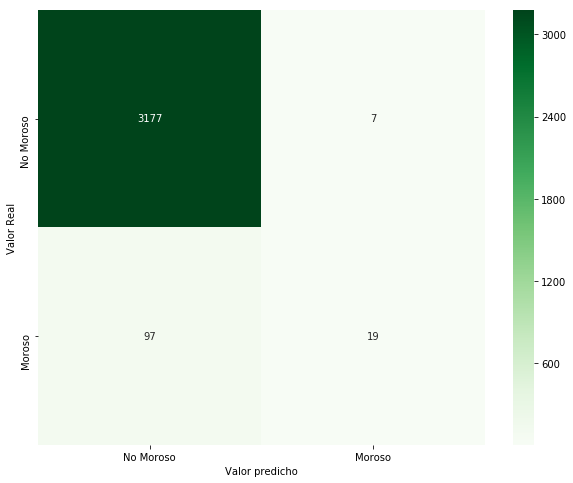

In [72]:
labels = ['No Moroso', 'Moroso']

# COnfusion Matrix
plt.figure(figsize=(10,8))
ax= sns.heatmap(confusion_matrix(y_test, lda_yhat),annot=True, cmap='Greens', fmt='g');
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Valor predicho');
plt.ylabel('Valor Real');
plt.show()

In [73]:
# Classification Report
print('0: No Morosos\n1: Morosos')
print(classification_report(y_test, lda_yhat))

0: No Morosos
1: Morosos
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3184
           1       0.73      0.16      0.27       116

    accuracy                           0.97      3300
   macro avg       0.85      0.58      0.63      3300
weighted avg       0.96      0.97      0.96      3300



* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general

El modelo logra predecir con un 97% de precisión a los usuarios No morosos pero vemos como su capacidad predictiva par alos usuarios morosos está errada casi en su totalidad (97 usuarios mal clasificados contra 19 usuarios bien clasificados). 

# Ejercicio 3 - Refactorización 1 - información a priori

* Dado que trabajamos con modelos generativos, podemos incluir información exógena. Para este caso agregaremos dis distribuciones:
    * Asumamos que hay un 50/50 de morosos y no morosos
    * Asumamos que hay un 60/40 de morosos y no morosos
* Por cada modelo, reporte las métricas de clasificación

Modelo con 50/50 de Morosos y no Morosos

In [74]:
model_5050 = LinearDiscriminantAnalysis(priors=[0.5,0.5])
model_5050.fit(X_train, y_train)

print("Probabilidades a priori con 50/50 \n", np.round(model_5050.priors_,2), "\n")
print("Medias de atributos en cada clase\n", model_5050.means_, "\n")
print("Varianza explicada por cada discriminante\n",
model_5050.explained_variance_ratio_, "\n")

yhat_5050 = model_5050.predict(x_test)

Probabilidades a priori con 50/50 
 [0.5 0.5] 

Medias de atributos en cada clase
 [[-0.05967703  0.00238058 -0.00324736]
 [ 1.86498698 -0.0868256   0.16294002]] 

Varianza explicada por cada discriminante
 [1.] 



Matriz de Confusión y Classification Report

La matriz de confusión, con distribución 50/50 es:


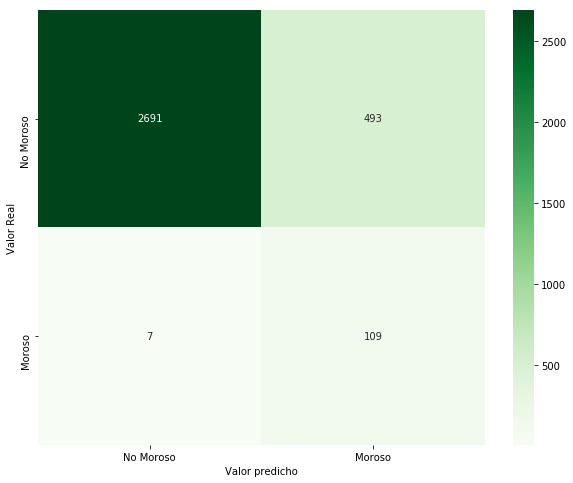

              precision    recall  f1-score   support

           0       1.00      0.85      0.91      3184
           1       0.18      0.94      0.30       116

    accuracy                           0.85      3300
   macro avg       0.59      0.89      0.61      3300
weighted avg       0.97      0.85      0.89      3300



In [75]:
print('La matriz de confusión, con distribución 50/50 es:')
plt.figure(figsize=(10,8))
ax= sns.heatmap(confusion_matrix(y_test, yhat_5050),
                annot=True, cmap='Greens', fmt='g');
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Valor predicho');
plt.ylabel('Valor Real');
plt.show()

print(classification_report(y_test, yhat_5050))

Modelo con 60/40 de Morosos y no Morosos

In [76]:
model_6040 = LinearDiscriminantAnalysis(priors=[0.6,0.4])
model_6040.fit(X_train, y_train)

print("Probabilidades a priori con 60/40 \n", np.round(model_6040.priors_,2), "\n")
print("Medias de atributos en cada clase\n", model_6040.means_, "\n")
print("Varianza explicada por cada discriminante\n",
model_6040.explained_variance_ratio_, "\n")

yhat_6040 = model_6040.predict(x_test)
yhat_6040[:20]

Probabilidades a priori con 60/40 
 [0.6 0.4] 

Medias de atributos en cada clase
 [[-0.05967703  0.00238058 -0.00324736]
 [ 1.86498698 -0.0868256   0.16294002]] 

Varianza explicada por cada discriminante
 [1.] 



array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

Matriz de Confusión y Classification Report

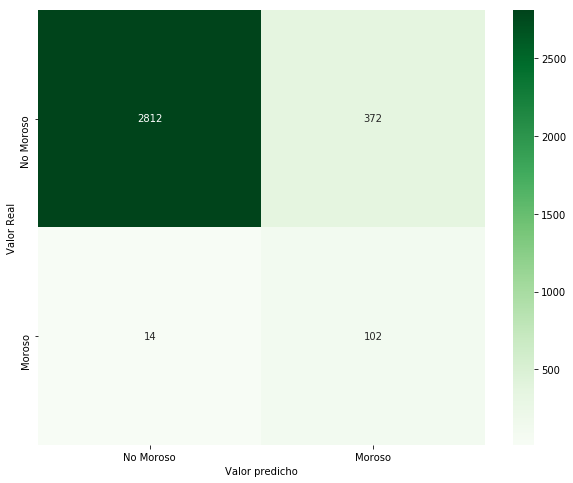

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3184
           1       0.22      0.88      0.35       116

    accuracy                           0.88      3300
   macro avg       0.61      0.88      0.64      3300
weighted avg       0.97      0.88      0.92      3300



In [79]:
plt.figure(figsize=(10,8))
ax= sns.heatmap(confusion_matrix(y_test, yhat_6040),
                annot=True, cmap='Greens', fmt='g');
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Valor predicho');
plt.ylabel('Valor Real');
plt.show()


print(classification_report(y_test, yhat_6040))

El modelom no mejora sus métricas con estos cambios.

# Ejercicio 4 - Refactorización 2 - oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [81]:
# Instanciamos la clase
oversampler = SMOTE(random_state=1781, ratio='minority')
# generamos el oversampling de la matriz de entrenamiento
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

* Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempeño

In [84]:
model_oversamp = LinearDiscriminantAnalysis()
model_oversamp.fit(X_train_oversamp, y_train_oversamp)

print("Probabilidades a priori, utilizando oversampling\n", 
      np.round(model_oversamp.priors_,2), "\n")
print("Medias de atributos en cada clase\n", 
      model_oversamp.means_, "\n")
print("Varianza explicada por cada discriminante\n",
      model_oversamp.explained_variance_ratio_, "\n")

yhat_oversamp = model_oversamp.predict(x_test)

Probabilidades a priori, utilizando oversampling
 [0.5 0.5] 

Medias de atributos en cada clase
 [[-0.05967703  0.00238058 -0.00324736]
 [ 1.87614822 -0.08491139  0.1636013 ]] 

Varianza explicada por cada discriminante
 [1.] 



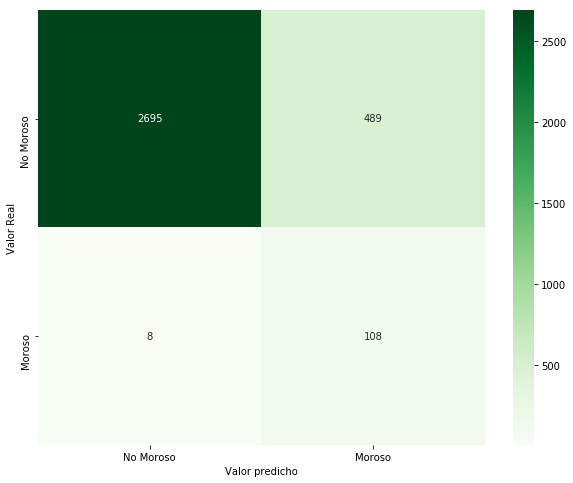

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3184
           1       0.18      0.93      0.30       116

    accuracy                           0.85      3300
   macro avg       0.59      0.89      0.61      3300
weighted avg       0.97      0.85      0.89      3300



In [89]:
plt.figure(figsize=(10,8))
ax= sns.heatmap(confusion_matrix(y_test, yhat_oversamp),
                annot=True, cmap='Greens', fmt='g');
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Valor predicho');
plt.ylabel('Valor Real');
plt.show()

print(classification_report(y_test, yhat_oversamp))

El modelo con oversamp tiene un rendimiento parecido al modelo con 50/50.

# Ejercicio 5 - Refactorización 3 - QDA

* Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos aumentados artificialmente. Genere las métricas de desempeño. 
* Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva. 

In [90]:
model_quadratic = QuadraticDiscriminantAnalysis()
model_quadratic.fit(X_train_oversamp, y_train_oversamp)

print("Probabilidades a priori, utilizando quadratic discriminant analysis\n", 
      np.round(model_quadratic.priors_,2), "\n")
print("Medias de atributos en cada clase\n", 
      model_quadratic.means_, "\n")

yhat_quadratic = model_quadratic.predict(x_test)

Probabilidades a priori, utilizando quadratic discriminant analysis
 [0.5 0.5] 

Medias de atributos en cada clase
 [[-0.05967703  0.00238058 -0.00324736]
 [ 1.87614822 -0.08491139  0.1636013 ]] 



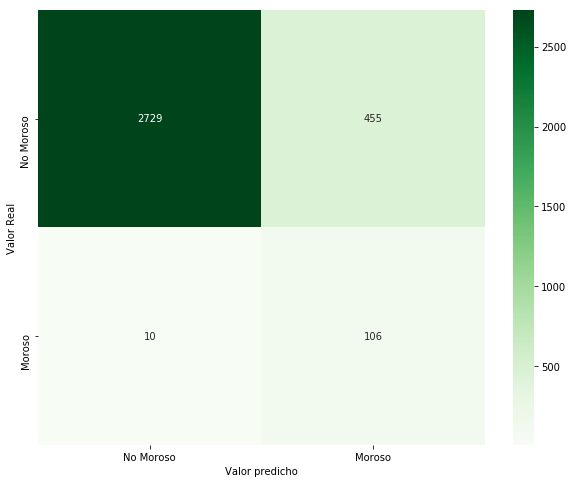

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3184
           1       0.19      0.91      0.31       116

    accuracy                           0.86      3300
   macro avg       0.59      0.89      0.62      3300
weighted avg       0.97      0.86      0.90      3300



In [93]:
plt.figure(figsize=(10,8))
ax= sns.heatmap(confusion_matrix(y_test, yhat_quadratic),
                annot=True, cmap='Greens', fmt='g');
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Valor predicho');
plt.ylabel('Valor Real');
plt.show()

print(classification_report(y_test, yhat_quadratic))

A modo de conclusión, el modelo con mejor rendimiento es el modelo inicial LDA sin oversampling. Las variaciones que siguen tienen imapcto en las métricas pero fallan en los falsos positivos: personas no morosas que son clasificadas como morosas.